In [14]:
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')
from astropy.io import fits
from astropy.convolution import convolve, Box1DKernel
from astropy.time import Time
import astropy.constants as C
import astropy.units as u

# Combine observations weighting by error (if none, use sqrt(n))

# Combine each roll angle

### Roll Angle 1

In [3]:
SWIFT_DIR = '../data/swiftuvot/reduced_default/'
obsid_list1 = ['00034040001']
data_list1 = []
exptime_list1 = []
for obsid in obsid_list1:
    flist1 = glob.glob(os.path.join(SWIFT_DIR, obsid, 'uvot', 'image', '*.pha'))
    print(os.path.join(SWIFT_DIR, obsid, 'uvot', 'image', '*.pha'))
    for ifile in flist1:
        
        tbdata = fits.getdata(ifile, 2)
        data_list1.append(tbdata)
        exptime_list1.append(fits.getval(ifile, 'exposure',2))

../data/swiftuvot/reduced_default/00034040001/uvot/image/*.pha


In [4]:
wl1 = data_list1[0]['LAMBDA']
flux_list1 = []
wht_list1 = []
for exptime, tbdata in zip(exptime_list1, data_list1):
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht1 = 1/tbdata['FLUXERR']
    flux_list1.append(np.interp(wl1, tbdata['LAMBDA'], tbdata['FLUX']))
    wht_list1.append(np.interp(wl1, tbdata['LAMBDA'], wht1)*exptime)
flux_arr1 = np.array(flux_list1)
wht_arr1 = np.array(wht_list1)
final_spec1 = np.sum(flux_arr1*wht_arr1, axis=0)/np.sum(wht_arr1, axis=0)
smoothed_signal1 = convolve(final_spec1, Box1DKernel(11))



(-5e-15, 1.3e-14)

### Roll Angle 2

In [5]:
SWIFT_DIR = '../data/swiftuvot/reduced_default/'
obsid_list2 = ['00034040002']
data_list2 = []
exptime_list2=[]
for obsid in obsid_list2:
    flist2 = glob.glob(os.path.join(SWIFT_DIR, obsid, 'uvot', 'image', '*.pha'))
    print(os.path.join(SWIFT_DIR, obsid, 'uvot', 'image', '*.pha'))
    for ifile in flist2:
        
        tbdata = fits.getdata(ifile, 2)
        data_list2.append(tbdata)
        exptime_list2.append(fits.getval(ifile, 'exposure', 2))

../data/swiftuvot/reduced_default/00034040002/uvot/image/*.pha


In [6]:
wl2 = data_list2[0]['LAMBDA']
flux_list2 = []
wht_list2 = []
for exptime, tbdata in zip(exptime_list2, data_list2):
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht2 = 1/tbdata['FLUXERR']
    flux_list2.append(np.interp(wl2, tbdata['LAMBDA'], tbdata['FLUX']))
    wht_list2.append(np.interp(wl2, tbdata['LAMBDA'], wht2)*exptime)
flux_arr2 = np.array(flux_list2)
wht_arr2 = np.array(wht_list2)
final_spec2 = np.sum(flux_arr2*wht_arr2, axis=0)/np.sum(wht_arr2, axis=0)
smoothed_signal2 = convolve(final_spec2, Box1DKernel(11))


(-5e-15, 1.3e-14)

### All together

In [7]:
SWIFT_DIR = '../data/swiftuvot/reduced_default/'
obsid_list = ['00034040001', '00034040002']
data_list = []
exptime_list = []
for obsid in obsid_list:
    flist = glob.glob(os.path.join(SWIFT_DIR, obsid, 'uvot', 'image', '*.pha'))
    print(os.path.join(SWIFT_DIR, obsid, 'uvot', 'image', '*.pha'))
    for ifile in flist:
        tbdata = fits.getdata(ifile, 2)
        data_list.append(tbdata)
        exptime_list.append(fits.getval(ifile, 'exposure', 2))


../data/swiftuvot/reduced_default/00034040001/uvot/image/*.pha
../data/swiftuvot/reduced_default/00034040002/uvot/image/*.pha


In [8]:
wl = data_list[0]['LAMBDA']
flux_list = []
wht_list = []
for exptime, tbdata in zip(exptime_list,data_list):
    # interpolate to first wavelength range
    # take average weighted by flux error
    # weight by exposure time too
    wht = 1/tbdata['FLUXERR']
    flux_list.append(np.interp(wl, tbdata['LAMBDA'], tbdata['FLUX']))
    wht_list.append(np.interp(wl, tbdata['LAMBDA'], wht)*exptime)
flux_arr = np.array(flux_list)
wht_arr = np.array(wht_list)
total_exptime = np.sum(np.array(exptime_list))
final_spec = np.sum(flux_arr*wht_arr, axis=0)/np.sum(wht_arr, axis=0)
smoothed_signal = convolve(final_spec, Box1DKernel(11))


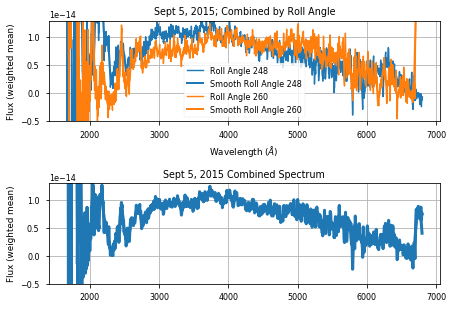

In [18]:
fig = plt.figure()
ax_final = fig.add_subplot(2,1,2)
ax_indiv_roll = fig.add_subplot(2,1,1)
ax_final.grid()
ax_indiv_roll.grid()

ax_indiv_roll.set_xlabel('Wavelength ($\AA$)')
ax_indiv_roll.set_ylabel('Flux (weighted mean)')
ax_final.set_ylabel('Flux (weighted mean)')
ax_final.set_title('Sept 5, 2015 Combined Spectrum')
ax_indiv_roll.set_title('Sept 5, 2015; Combined by Roll Angle')

l1 = ax_indiv_roll.plot(wl1,final_spec1 , label = 'Roll Angle 248')
ax_indiv_roll.plot(wl1, smoothed_signal1, label = 'Smooth Roll Angle 248', color = l1[0].get_color(), lw=2)
ax_indiv_roll.set_ylim(-0.5E-14,1.3E-14)

l2 = ax_indiv_roll.plot(wl2,final_spec2, label = 'Roll Angle 260')
ax_indiv_roll.plot(wl2, smoothed_signal2, label = 'Smooth Roll Angle 260', color = l2[0].get_color(), lw=2)
ax_indiv_roll.set_ylim(-0.5E-14,1.3E-14)

l3 = ax_final.plot(wl, final_spec , label = 'Final Spectrum', lw=3)
ax_final.plot(wl, smoothed_signal, label = 'Smoothed Final Spectrum', lw=3, color = l3[0].get_color())
ax_final.set_ylim(-0.5E-14,1.3E-14)
ax_indiv_roll.legend(loc='best')

plt.tight_layout()

# Scale Swift to UV photometry

In [19]:
import supernova as sn
import spectroscopy as spec
import define_filters

In [24]:
date_obs = Time('2015-09-05')
sn15oz_lc = sn.LightCurve2('asassn-15oz')
print(sn15oz_lc)
sn15oz_lc.get_photometry()
sn15oz_lc.get_abs_mag()

In [25]:
print(sn15oz_lc.jd.keys())

dict_keys(['uw1', 'R', 'I', 'B', 'i', 'g', 'us', 'V', 'r', 'vs', 'um2', 'uw2', 'U', 'bs'])


#### Get the closest photometry point to spectroscopic observation

In [26]:
def get_closest_photometry(date_obs, jd, phot_mag):
    date_indx = np.argmin(np.abs(jd - date_obs.jd))
    closest_mag = phot_mag[date_indx]
    date_sep = (jd - date_obs.jd)[date_indx]
    return closest_mag, date_sep

#### Convert to Flux

In [27]:
def convert_mag_to_flux(phot_mag, ifilter):
    bandpar_dict = define_filters.define_filters()
    flux = 10**(np.array(phot_mag)/-2.5)*bandpar_dict[ifilter][4]
    return flux

#### Get Central Wavelength

In [28]:
def get_cenwave(ifilter):
    bandpar_dict = define_filters.define_filters()
    cenwave = bandpar_dict[ifilter][2]
    return cenwave

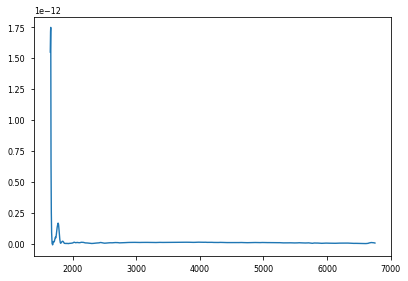

In [29]:
plt.figure()
rest_wl = spec.apply_redshift(wl, 0.006929 ) #redshift from SNEX
plt.plot(rest_wl, smoothed_signal)
#plt.plot(rest_wl, final_spec)

(-5e-15, 2e-14)

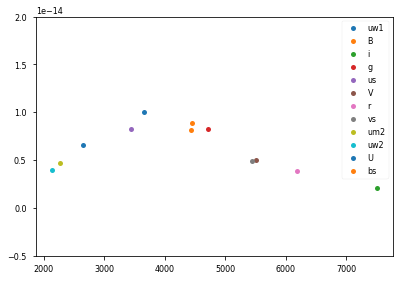

In [30]:

for ifilter in sn15oz_lc.jd.keys():
    cenwave = get_cenwave(ifilter)
    mag, date_sep = get_closest_photometry(date_obs, sn15oz_lc.jd[ifilter], sn15oz_lc.apparent_mag[ifilter])
    if date_sep < 2:
        flux = convert_mag_to_flux(mag, ifilter)
        plt.plot(cenwave, flux, 'o', label=ifilter, markersize=5)
plt.legend()
plt.ylim(-0.5E-14, 2E-14)

# Scale Floyds to Optical Photometry

In [31]:
cur_dir = os.getcwd()
FLOYDS_file = os.path.join(os.path.split(cur_dir)[0],'data/spectra/lco/asassn-15oz_20150906_redblu_105042.698a_multi.fits')
quba_filename = os.path.join(os.path.split(FLOYDS_file)[0],'quba_input_phot.ascii')
quba_file = open(quba_filename, 'w')
quba_hdr = '# name'
quba_str = '{}'.format(os.path.basename(FLOYDS_file))
quba_hdr = '{}{}'.format(quba_hdr, ' '*(len(quba_str)-len(quba_hdr)))
for ifilter in sn15oz_lc.jd.keys():
    cenwave = get_cenwave(ifilter)
    if cenwave > 3500:
        mag, date_sep = get_closest_photometry(date_obs, sn15oz_lc.jd[ifilter], sn15oz_lc.apparent_mag[ifilter])
        if (date_sep < 2) and (len(ifilter)==1):
            quba_str = '{}    {}'.format(quba_str, mag)
            quba_hdr = '{}    {}      '.format(quba_hdr, ifilter)
quba_file.write('{}\n'.format(quba_hdr))
quba_file.write(quba_str)
quba_file.close()

# Scale spectra outside of notebook with command


In [32]:

print('cd {}'.format(os.path.split(FLOYDS_file)[0]) )
print('qubascalespectra.py {} {}'.format(os.path.basename(quba_filename),
                                            '/Users/bostroem/Dropbox/DLT40_all/script/scalespectra/filters/'))

cd /Users/bostroem/Desktop/research/asassn15oz/data/spectra/lco
qubascalespectra.py quba_input_phot.ascii /Users/bostroem/Dropbox/DLT40_all/script/scalespectra/filters/


In [33]:
cur_dir = os.getcwd()
FLOYDS_file = os.path.join(os.path.split(cur_dir)[0],'data/spectra/lco/asassn-15oz_20150906_redblu_105042.698a_multi.fits')
ofile = fits.open(os.path.join(os.path.split(FLOYDS_file)[0],'asassn-15oz_20150906_redblu_105042.698asca.fits'))
flux_floyds = ofile[0].data[0,0,:]
wl_floyds = spec.calc_wavelength(ofile[0].header, np.arange(len(flux_floyds))+1)
smoothed_signal_floyds = convolve(flux_floyds, Box1DKernel(17))

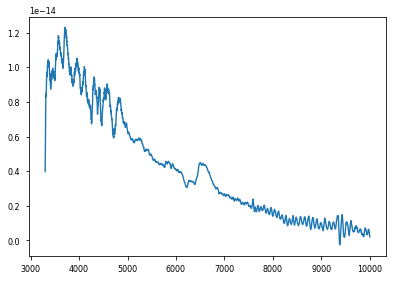

In [34]:
plt.plot(wl_floyds, smoothed_signal_floyds)

#plt.plot(wl_floyds, flux_floyds)

# Plot Photometry, Swift, Floyds on plot for poster

### Plot FLOYDS 

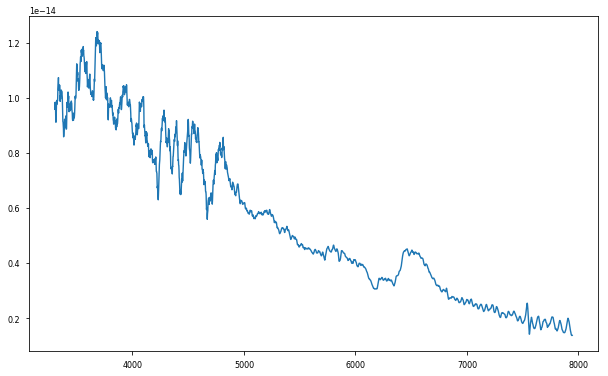

In [44]:
fig = plt.figure(figsize=[10.2, 6.15])
ax = fig.add_subplot(1,1,1)
good_indx_floyds = (wl_floyds > 3325) & (wl_floyds < 8000)
smoothed_signal_floyds = convolve(flux_floyds, Box1DKernel(11))
rest_wl_floyds = spec.apply_redshift(wl_floyds, 0.006929 )
ax.plot(rest_wl_floyds[good_indx_floyds], smoothed_signal_floyds[good_indx_floyds], label='FLOYDS')
#ax.plot(wl_floyds[good_indx_floyds], flux_floyds[good_indx_floyds], label='FLOYDS')

### Plot swift spectrum

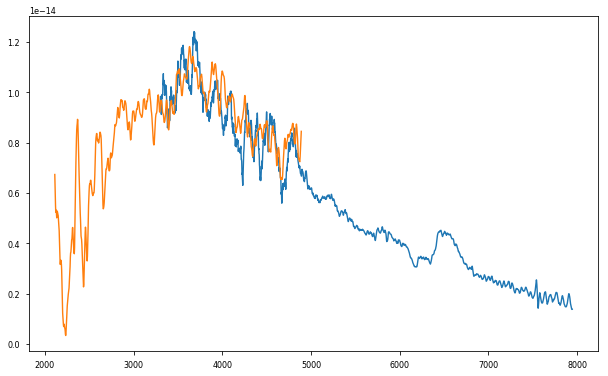

In [45]:
fig = plt.figure(figsize=[10.2, 6.15])
ax = fig.add_subplot(1,1,1)
good_indx_floyds = (wl_floyds > 3325) & (wl_floyds < 8000)
smoothed_signal_floyds = convolve(flux_floyds, Box1DKernel(11))
rest_wl_floyds = spec.apply_redshift(wl_floyds, 0.006929 )
ax.plot(rest_wl_floyds[good_indx_floyds], smoothed_signal_floyds[good_indx_floyds], label='FLOYDS')
#ax.plot(wl_floyds[good_indx_floyds], flux_floyds[good_indx_floyds], label='FLOYDS')
rest_wl = spec.apply_redshift(wl, 0.006929 ) #redshift from SNEX
smoothed_signal_swift = convolve(final_spec, Box1DKernel(6))
good_indx = (wl > 2200) & (wl < 5000)
ax.plot(rest_wl[good_indx]-72.5, smoothed_signal_swift[good_indx], label="SWIFT")
#ax.plot(rest_wl[good_indx], final_spec[good_indx], label="SWIFT")

### Plot Photometry

(0, 1.4e-14)

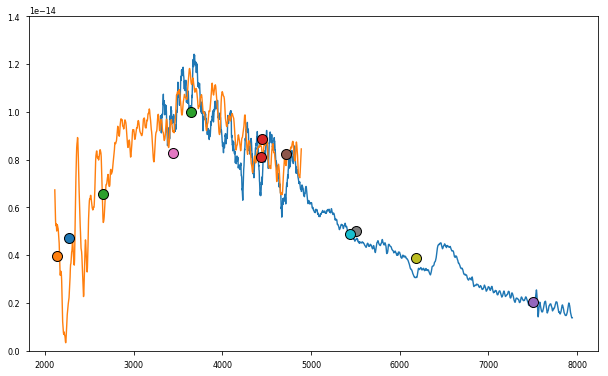

In [46]:
fig = plt.figure(figsize=[10.2, 6.15])
ax = fig.add_subplot(1,1,1)
good_indx_floyds = (wl_floyds > 3325) & (wl_floyds < 8000)
smoothed_signal_floyds = convolve(flux_floyds, Box1DKernel(11))
rest_wl_floyds = spec.apply_redshift(wl_floyds, 0.006929 )
ax.plot(rest_wl_floyds[good_indx_floyds], smoothed_signal_floyds[good_indx_floyds], label='FLOYDS')
#ax.plot(wl_floyds[good_indx_floyds], flux_floyds[good_indx_floyds], label='FLOYDS')
rest_wl = spec.apply_redshift(wl, 0.006929 ) #redshift from SNEX
smoothed_signal_swift = convolve(final_spec, Box1DKernel(6))
good_indx = (wl > 2200) & (wl < 5000)
ax.plot(rest_wl[good_indx]-72.5, smoothed_signal_swift[good_indx], label="SWIFT")
#ax.plot(rest_wl[good_indx], final_spec[good_indx], label="SWIFT")
for ifilter in sn15oz_lc.jd.keys():
    cenwave = get_cenwave(ifilter)
    mag, date_sep = get_closest_photometry(date_obs, sn15oz_lc.jd[ifilter], sn15oz_lc.apparent_mag[ifilter])
    if date_sep < 2:
        flux = convert_mag_to_flux(mag, ifilter)
        ax.plot(cenwave, flux, 'o', label=ifilter, markersize=10, mec='k', mew=1)
ax.set_ylim(0, 1.4E-14)

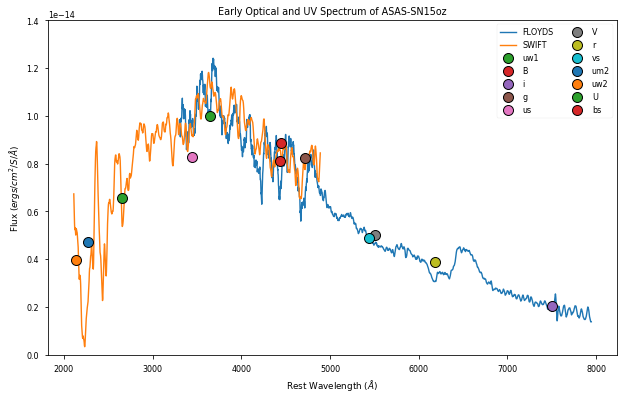

In [47]:
fig = plt.figure(figsize=[10.2, 6.15])
ax = fig.add_subplot(1,1,1)
good_indx_floyds = (wl_floyds > 3325) & (wl_floyds < 8000)
smoothed_signal_floyds = convolve(flux_floyds, Box1DKernel(11))
rest_wl_floyds = spec.apply_redshift(wl_floyds, 0.006929 )
ax.plot(rest_wl_floyds[good_indx_floyds], smoothed_signal_floyds[good_indx_floyds], label='FLOYDS')
#ax.plot(wl_floyds[good_indx_floyds], flux_floyds[good_indx_floyds], label='FLOYDS')
rest_wl = spec.apply_redshift(wl, 0.006929 ) #redshift from SNEX
smoothed_signal_swift = convolve(final_spec, Box1DKernel(6))
good_indx = (wl > 2200) & (wl < 5000)
ax.plot(rest_wl[good_indx]-72.5, smoothed_signal_swift[good_indx], label="SWIFT")
#ax.plot(rest_wl[good_indx], final_spec[good_indx], label="SWIFT")
for ifilter in sn15oz_lc.jd.keys():
    cenwave = get_cenwave(ifilter)
    mag, date_sep = get_closest_photometry(date_obs, sn15oz_lc.jd[ifilter], sn15oz_lc.apparent_mag[ifilter])
    if date_sep < 2:
        flux = convert_mag_to_flux(mag, ifilter)
        ax.plot(cenwave, flux, 'o', label=ifilter, markersize=10, mec='k', mew=1)
ax.set_ylim(0, 1.4E-14)
ax.set_title('Early Optical and UV Spectrum of ASAS-SN15oz')
ax.set_xlabel('Rest Wavelength ($\AA$)')
ax.set_ylabel('Flux ($ergs/cm^2/S/\AA$)')
plt.legend(loc='best', ncol=2)

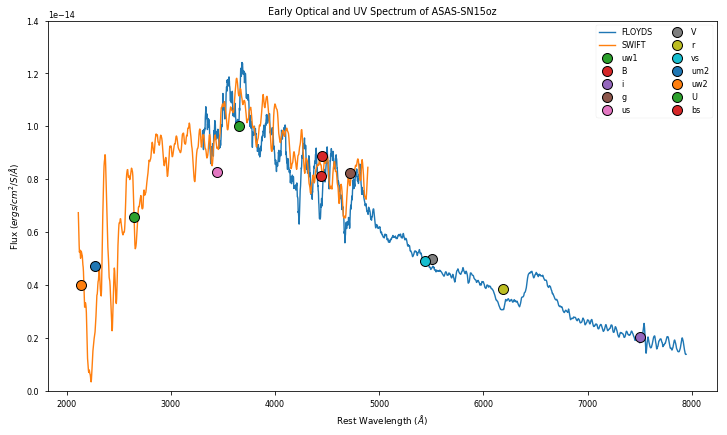

In [48]:
fig = plt.figure(figsize=[10.2, 6.15])
ax = fig.add_subplot(1,1,1)
good_indx_floyds = (wl_floyds > 3325) & (wl_floyds < 8000)
smoothed_signal_floyds = convolve(flux_floyds, Box1DKernel(11))
rest_wl_floyds = spec.apply_redshift(wl_floyds, 0.006929 )
ax.plot(rest_wl_floyds[good_indx_floyds], smoothed_signal_floyds[good_indx_floyds], label='FLOYDS')
#ax.plot(wl_floyds[good_indx_floyds], flux_floyds[good_indx_floyds], label='FLOYDS')
rest_wl = spec.apply_redshift(wl, 0.006929 ) #redshift from SNEX
smoothed_signal_swift = convolve(final_spec, Box1DKernel(6))
good_indx = (wl > 2200) & (wl < 5000)
ax.plot(rest_wl[good_indx]-72.5, smoothed_signal_swift[good_indx], label="SWIFT")
#ax.plot(rest_wl[good_indx], final_spec[good_indx], label="SWIFT")
for ifilter in sn15oz_lc.jd.keys():
    cenwave = get_cenwave(ifilter)
    mag, date_sep = get_closest_photometry(date_obs, sn15oz_lc.jd[ifilter], sn15oz_lc.apparent_mag[ifilter])
    if date_sep < 2:
        flux = convert_mag_to_flux(mag, ifilter)
        ax.plot(cenwave, flux, 'o', label=ifilter, markersize=10, mec='k', mew=1)
ax.set_ylim(0, 1.4E-14)
ax.set_title('Early Optical and UV Spectrum of ASAS-SN15oz')
ax.set_xlabel('Rest Wavelength ($\AA$)')
ax.set_ylabel('Flux ($ergs/cm^2/S/\AA$)')
plt.legend(loc='best', ncol=2)
plt.tight_layout()
plt.savefig('../figures/uv_optical_spec_sept_5.pdf')

In [49]:
import spectral_features

In [50]:
def shift_spectral_features(species, velocity, phase):
    '''
    Velocity is expected in km/s
    '''
    spec_lib = spectral_features.spectral_features()
    wl_species = spec_lib[phase][species]
    redshift = velocity*(u.km/u.s)/(C.c.to(u.km/u.s))
    wl_species_shifted = spec.apply_redshift(wl_species, redshift)
    return wl_species_shifted
                         

In [51]:
hydrogen = shift_spectral_features('H', 10000, 'Early')
ax.vlines(hydrogen[0:3], *ax.get_ylim(), label='H', linestyle=':')

KeyError: 'Early'

In [52]:
hydrogen = shift_spectral_features('H', 18500, 'Early')
ax.vlines(hydrogen[0:3], *ax.get_ylim(), label='HV H', color='LightGray')

KeyError: 'Early'

In [53]:
helium = shift_spectral_features('He I', 8000, 'Early')
ax.vlines(helium, *ax.get_ylim(), label='He I', color='r')

KeyError: 'Early'

In [54]:
scII = shift_spectral_features('Sc II', 8000, 'Photospheric')
ax.vlines(scII, *ax.get_ylim(), label='He I', color='r')

KeyError: 'Photospheric'

No handles with labels found to put in legend.


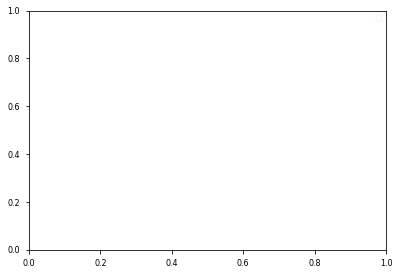

In [55]:
plt.legend(loc='best')

# Compare different extraction locations

In [58]:

SWIFT_DIR_first = '../data/swiftuvot/reduced_default/'
SWIFT_DIR_zero = '../data/swiftuvot/reduced_center_zeroth/'
obsid_list = ['00034040002']
data_list = []
data_list_zero = []
for obsid in obsid_list:
    flist_first = glob.glob(os.path.join(SWIFT_DIR_first, obsid, 'uvot', 'image', '*.pha'))
    print(os.path.join(SWIFT_DIR, obsid, 'uvot', 'image', '*.pha'))
    for ifile in flist:
        tbdata = fits.getdata(ifile, 2)
        tbdata_zero = fits.getdata(ifile.replace(SWIFT_DIR_first, SWIFT_DIR_zero), 2)
        data_list.append(tbdata)
        data_list_zero.append(tbdata_zero)

../data/swiftuvot/reduced_default/00034040002/uvot/image/*.pha


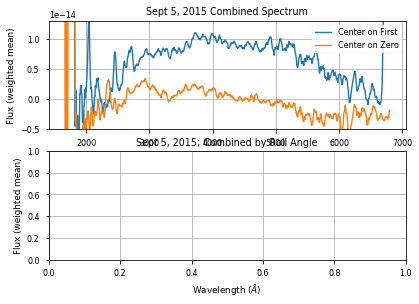

In [57]:
fig = plt.figure()
ax_final = fig.add_subplot(2,1,1)
ax_indiv_roll = fig.add_subplot(2,1,2)
ax_final.grid()
ax_indiv_roll.grid()

ax_indiv_roll.set_xlabel('Wavelength ($\AA$)')
ax_indiv_roll.set_ylabel('Flux (weighted mean)')
ax_final.set_ylabel('Flux (weighted mean)')
ax_final.set_title('Sept 5, 2015 Combined Spectrum')
ax_indiv_roll.set_title('Sept 5, 2015; Combined by Roll Angle')

wl = data_list[0]['LAMBDA']
flux_list = []
flux_list_zero = []
wht_list = []
wht_list_zero = []
for tbdata in data_list:
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht = 1/tbdata['FLUXERR']
    flux_list.append(np.interp(wl, tbdata['LAMBDA'], tbdata['FLUX']))
    wht_list.append(np.interp(wl, tbdata['LAMBDA'], wht))
flux_arr = np.array(flux_list)
wht_arr = np.array(wht_list)
final_spec = np.sum(flux_arr*wht_arr, axis=0)/np.sum(wht_arr, axis=0)
smoothed_signal = convolve(final_spec, Box1DKernel(11))
ax_final.plot(wl, smoothed_signal, label = 'Center on First')

for tbdata_zero in data_list_zero:
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht_zero = 1/tbdata_zero['FLUXERR']
    flux_list_zero.append(np.interp(wl, tbdata_zero['LAMBDA'], tbdata_zero['FLUX']))
    wht_list_zero.append(np.interp(wl, tbdata_zero['LAMBDA'], wht_zero))
flux_arr_zero = np.array(flux_list_zero)
wht_arr_zero = np.array(wht_list_zero)
final_spec_zero = np.sum(flux_arr_zero*wht_arr_zero, axis=0)/np.sum(wht_arr_zero, axis=0)
smoothed_signal_zero = convolve(final_spec_zero, Box1DKernel(11))
ax_final.plot(wl, smoothed_signal_zero, label = 'Center on Zero')


ax_final.set_ylim(-0.5E-14,1.3E-14)
ax_final.legend()

## The extraction aligned with the first order has the most signal

# Compare TRUVOT to Original extraction yoffset=None

Text(0.5,0,'Wavelength')

In [66]:
SWIFT_DIR_original = '../data/swiftuvot/test_truvot_extraction/original/'
SWIFT_DIR_truvot = '../data/swiftuvot/test_truvot_extraction/truvot/'
obsid_list = ['00034040002']
data_list = []
data_list_truvot = []
for obsid in obsid_list:
    flist_original = glob.glob(os.path.join(SWIFT_DIR_original, obsid, 'uvot', 'image', '*.pha'))
    print(os.path.join(SWIFT_DIR_original, obsid, 'uvot', 'image', '*.pha'))
    for ifile in flist_original:
        tbdata = fits.getdata(ifile, 2)
        tbdata_truvot = fits.getdata(ifile.replace(SWIFT_DIR_original, SWIFT_DIR_truvot), 2)
        data_list.append(tbdata)
        data_list_truvot.append(tbdata_truvot)

../data/swiftuvot/test_truvot_extraction/original/00034040002/uvot/image/*.pha


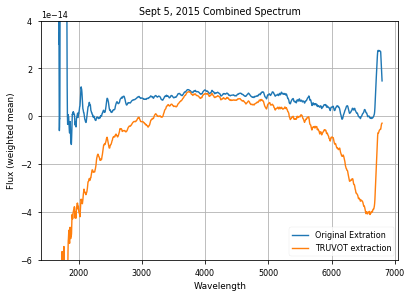

In [67]:
fig = plt.figure()
ax_final = fig.add_subplot(1,1,1)
ax_final.grid()

ax_final.set_ylabel('Flux (weighted mean)')
ax_final.set_title('Sept 5, 2015 Combined Spectrum')
ax_final.set_xlabel('Wavelength')

wl = data_list[0]['LAMBDA']
flux_list = []
flux_list_truvot = []
wht_list = []
wht_list_truvot = []
for tbdata in data_list:
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht = 1/tbdata['FLUXERR']
    flux_list.append(np.interp(wl, tbdata['LAMBDA'], tbdata['FLUX']))
    wht_list.append(np.interp(wl, tbdata['LAMBDA'], wht))
flux_arr = np.array(flux_list)
wht_arr = np.array(wht_list)
final_spec = np.sum(flux_arr*wht_arr, axis=0)/np.sum(wht_arr, axis=0)
smoothed_signal = convolve(final_spec, Box1DKernel(11))
ax_final.plot(wl, smoothed_signal, label = 'Original Extration')

for tbdata_truvot in data_list_truvot:
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht_truvot = 1/tbdata_truvot['FLUXERR']
    flux_list_truvot.append(np.interp(wl, tbdata_truvot['LAMBDA'], tbdata_truvot['FLUX']))
    wht_list_truvot.append(np.interp(wl, tbdata_truvot['LAMBDA'], wht_truvot))
flux_arr_truvot = np.array(flux_list_truvot)
wht_arr_truvot = np.array(wht_list_truvot)
final_spec_truvot = np.sum(flux_arr_truvot*wht_arr_truvot, axis=0)/np.sum(wht_arr_truvot, axis=0)
smoothed_signal_truvot = convolve(final_spec_truvot, Box1DKernel(11))
ax_final.plot(wl, smoothed_signal_truvot, label = 'TRUVOT extraction')
ax_final.set_xlabel('Wavelength')

ax_final.set_ylim(-6E-14,4E-14)
ax_final.legend()
plt.savefig('../figures/truvot_original_extraction_visit2.pdf')


../data/swiftuvot/test_truvot_extraction/original/00034040002/uvot/image/*.pha


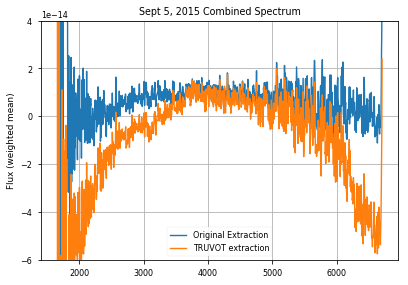

In [61]:
fig = plt.figure()
ax_final = fig.add_subplot(1,1,1)
ax_final.grid()

ax_final.set_ylabel('Flux (weighted mean)')
ax_final.set_title('Sept 5, 2015 Combined Spectrum')

SWIFT_DIR_original = '../data/swiftuvot/test_truvot_extraction/original/'
SWIFT_DIR_truvot = '../data/swiftuvot/test_truvot_extraction/truvot/'
obsid_list = ['00034040002']
data_list = []
data_list_truvot = []
for obsid in obsid_list:
    flist_original = glob.glob(os.path.join(SWIFT_DIR_original, obsid, 'uvot', 'image', '*ord_3_f.pha'))
    print(os.path.join(SWIFT_DIR_original, obsid, 'uvot', 'image', '*.pha'))
    for ifile in flist_original:
        tbdata = fits.getdata(ifile, 2)
        tbdata_truvot = fits.getdata(ifile.replace(SWIFT_DIR_original, SWIFT_DIR_truvot), 2)

        
ax_final.plot(tbdata['LAMBDA'], tbdata['FLUX'], label='Original Extraction')
ax_final.plot(tbdata_truvot['LAMBDA'], tbdata_truvot['FLUX'], label='TRUVOT extraction')


ax_final.set_ylim(-6E-14,4E-14)
ax_final.legend()

plt.savefig('../figures/truvot_original_extraction_visit1.pdf')

# Try to flatten TRUVOT extraction

In [81]:
from scipy.interpolate import UnivariateSpline, LSQUnivariateSpline

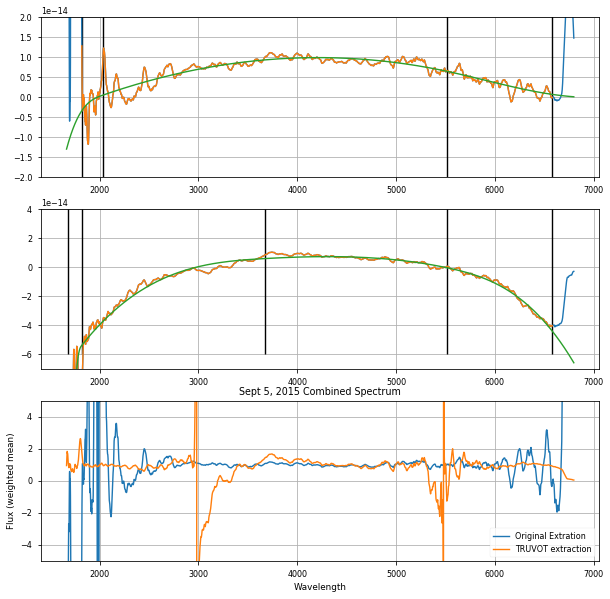

In [140]:
fig = plt.figure(figsize=[10,10])
ax_fit = fig.add_subplot(3,1,1)
ax_fit_truvot = fig.add_subplot(3,1,2)
ax_final = fig.add_subplot(3,1,3)
ax_final.grid()

ax_final.set_ylabel('Flux (weighted mean)')
ax_final.set_title('Sept 5, 2015 Combined Spectrum')
ax_final.set_xlabel('Wavelength')

wl = data_list[0]['LAMBDA']
flux_list = []
flux_list_truvot = []
wht_list = []
wht_list_truvot = []
for tbdata in data_list:
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht = 1/tbdata['FLUXERR']
    flux_list.append(np.interp(wl, tbdata['LAMBDA'], tbdata['FLUX']))
    wht_list.append(np.interp(wl, tbdata['LAMBDA'], wht))
flux_arr = np.array(flux_list)
wht_arr = np.array(wht_list)
final_spec = np.sum(flux_arr*wht_arr, axis=0)/np.sum(wht_arr, axis=0)
smoothed_signal = convolve(final_spec, Box1DKernel(11))


for tbdata_truvot in data_list_truvot:
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht_truvot = 1/tbdata_truvot['FLUXERR']
    flux_list_truvot.append(np.interp(wl, tbdata_truvot['LAMBDA'], tbdata_truvot['FLUX']))
    wht_list_truvot.append(np.interp(wl, tbdata_truvot['LAMBDA'], wht_truvot))
flux_arr_truvot = np.array(flux_list_truvot)
wht_arr_truvot = np.array(wht_list_truvot)
final_spec_truvot = np.sum(flux_arr_truvot*wht_arr_truvot, axis=0)/np.sum(wht_arr_truvot, axis=0)
smoothed_signal_truvot = convolve(final_spec_truvot, Box1DKernel(11))

truvot_fit = LSQUnivariateSpline(wl[10:-50], smoothed_signal_truvot[10:-50], t=np.linspace(wl[100], wl[-300], 3), k=3)
ax_fit_truvot.plot(wl, smoothed_signal_truvot, label = 'TRUVOT extraction')
ax_fit_truvot.plot(wl[10:-50], smoothed_signal_truvot[10:-50])
ax_fit_truvot.vlines(truvot_fit.get_knots(), ymin=-6E-14, ymax=4E-14)
ax_fit_truvot.plot(wl, truvot_fit(wl))
ax_fit_truvot.set_ylim(-7E-14,4E-14)


standard_fit = LSQUnivariateSpline(wl[100:-50], smoothed_signal[100:-50], t=np.linspace(wl[200], wl[-300], 2), k=3)
ax_fit.plot(wl, smoothed_signal, label = 'TRUVOT extraction')
ax_fit.plot(wl[100:-50], smoothed_signal[100:-50])
ax_fit.vlines(standard_fit.get_knots(), ymin=-6E-14, ymax=4E-14)
ax_fit.plot(wl, standard_fit(wl))
ax_fit.set_ylim(-2E-14,2E-14)
ax_final.plot(wl, smoothed_signal/standard_fit(wl), label = 'Original Extration')
ax_final.plot(wl, smoothed_signal_truvot/truvot_fit(wl), label = 'TRUVOT extraction')


ax_final.set_xlabel('Wavelength')
ax_fit.grid()
ax_fit_truvot.grid()


ax_final.set_ylim(-5, 5)
ax_final.legend()
plt.savefig('../figures/truvot_original_extraction_visit2_norm.pdf')

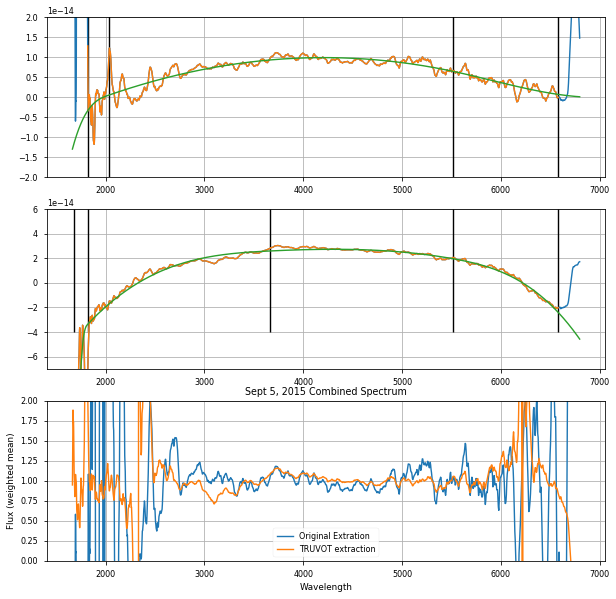

In [144]:
fig = plt.figure(figsize=[10,10])
ax_fit = fig.add_subplot(3,1,1)
ax_fit_truvot = fig.add_subplot(3,1,2)
ax_final = fig.add_subplot(3,1,3)
ax_final.grid()

ax_final.set_ylabel('Flux (weighted mean)')
ax_final.set_title('Sept 5, 2015 Combined Spectrum')
ax_final.set_xlabel('Wavelength')

wl = data_list[0]['LAMBDA']
flux_list = []
flux_list_truvot = []
wht_list = []
wht_list_truvot = []
for tbdata in data_list:
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht = 1/tbdata['FLUXERR']
    flux_list.append(np.interp(wl, tbdata['LAMBDA'], tbdata['FLUX']))
    wht_list.append(np.interp(wl, tbdata['LAMBDA'], wht))
flux_arr = np.array(flux_list)
wht_arr = np.array(wht_list)
final_spec = np.sum(flux_arr*wht_arr, axis=0)/np.sum(wht_arr, axis=0)
smoothed_signal = convolve(final_spec, Box1DKernel(11))

offset = 2E-14
for tbdata_truvot in data_list_truvot:
    # interpolate to first wavelength range
    # take average weighted by flux error
    wht_truvot = 1/tbdata_truvot['FLUXERR']
    flux_list_truvot.append(np.interp(wl, tbdata_truvot['LAMBDA'], tbdata_truvot['FLUX']))
    wht_list_truvot.append(np.interp(wl, tbdata_truvot['LAMBDA'], wht_truvot))
flux_arr_truvot = np.array(flux_list_truvot)
wht_arr_truvot = np.array(wht_list_truvot)
final_spec_truvot = np.sum(flux_arr_truvot*wht_arr_truvot, axis=0)/np.sum(wht_arr_truvot, axis=0)
smoothed_signal_truvot = convolve(final_spec_truvot, Box1DKernel(11))

truvot_fit = LSQUnivariateSpline(wl[10:-50], smoothed_signal_truvot[10:-50]+offset, t=np.linspace(wl[100], wl[-300], 3), k=3)
ax_fit_truvot.plot(wl, smoothed_signal_truvot+offset, label = 'TRUVOT extraction')
ax_fit_truvot.plot(wl[10:-50], smoothed_signal_truvot[10:-50]+offset)
ax_fit_truvot.vlines(truvot_fit.get_knots(), ymin=-6E-14+offset, ymax=4E-14+offset)
ax_fit_truvot.plot(wl, truvot_fit(wl))
ax_fit_truvot.set_ylim(-7E-14,4E-14+offset)


standard_fit = LSQUnivariateSpline(wl[100:-50], smoothed_signal[100:-50], t=np.linspace(wl[200], wl[-300], 2), k=3)
ax_fit.plot(wl, smoothed_signal, label = 'TRUVOT extraction')
ax_fit.plot(wl[100:-50], smoothed_signal[100:-50])
ax_fit.vlines(standard_fit.get_knots(), ymin=-6E-14, ymax=4E-14)
ax_fit.plot(wl, standard_fit(wl))
ax_fit.set_ylim(-2E-14,2E-14)
ax_final.plot(wl, smoothed_signal/standard_fit(wl), label = 'Original Extration')
ax_final.plot(wl, (smoothed_signal_truvot+offset)/truvot_fit(wl), label = 'TRUVOT extraction')


ax_final.set_xlabel('Wavelength')
ax_fit.grid()
ax_fit_truvot.grid()


ax_final.set_ylim(0, 2)
ax_final.legend()

In [ ]:
fig = plt.figure()
ax_final = fig.add_subplot(2,1,2)
ax_indiv_roll = fig.add_subplot(2,1,1)
ax_final.grid()
ax_indiv_roll.grid()

ax_indiv_roll.set_xlabel('Wavelength ($\AA$)')
ax_indiv_roll.set_ylabel('Flux (weighted mean)')
ax_final.set_ylabel('Flux (weighted mean)')
ax_final.set_title('Sept 5, 2015 Combined Spectrum')
ax_indiv_roll.set_title('Sept 5, 2015; Combined by Roll Angle')

l1 = ax_indiv_roll.plot(wl1,final_spec1 , label = 'Roll Angle 248')
ax_indiv_roll.plot(wl1, smoothed_signal1, label = 'Smooth Roll Angle 248', color = l1[0].get_color(), lw=2)
ax_indiv_roll.set_ylim(-0.5E-14,1.3E-14)

l2 = ax_indiv_roll.plot(wl2,final_spec2, label = 'Roll Angle 260')
ax_indiv_roll.plot(wl2, smoothed_signal2, label = 'Smooth Roll Angle 260', color = l2[0].get_color(), lw=2)
ax_indiv_roll.set_ylim(-0.5E-14,1.3E-14)

l3 = ax_final.plot(wl, final_spec , label = 'Final Spectrum', lw=3)
ax_final.plot(wl, smoothed_signal, label = 'Smoothed Final Spectrum', lw=3, color = l3[0].get_color())
ax_final.set_ylim(-0.5E-14,1.3E-14)
ax_indiv_roll.legend(loc='best')

plt.tight_layout()